Import libraries and dependencies

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
#using metrics from sklearn to evaluate my model's accuracy
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression

Currency pair exchange rates for CAD/JPY

In [107]:
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


Trimming the dataset to begin on January 1st, 1990

In [109]:
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]

cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

In [28]:
returns = (cad_jpy_df[["Price"]].pct_change()*100)

returns = returns.replace(-np.inf, np.nan).dropna()

returns.rename({"Price":"Daily returns"}, axis=1, inplace=True)

cad_jpy_df["Returns"]=returns

cad_jpy_df.dropna(inplace=True)

### Lagged Returns 

In [40]:
cad_jpy_df['Lagged_Returns'] = cad_jpy_df["Returns"].copy().shift()

cad_jpy_df.dropna(inplace=True)

cad_jpy_df.head()

,Price,Open,High,Low,Returns,Lagged_Return,Lagged_Returns
Date,,,,,,,
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901,0.667901
1990-01-11,125.85,125.80,125.85,125.80,0.031794,0.567546,0.567546
1990-01-12,126.00,125.94,126.00,125.94,0.119190,0.031794,0.031794


### Train Test Split

Creating both our in-sample and out-of-sample datasets

In [41]:
train = cad_jpy_df[:'2017']

test = cad_jpy_df['2018':]

X independent variable will be represented by lagged return values which we will use to predict returns 'y'

In [67]:
X_train= train["Lagged_Returns"].to_frame()

X_test = test["Lagged_Returns"].to_frame()

y_train= train["Returns"]

y_test=test["Returns"]

In [110]:
X_train.head()

,Lagged_Returns
Date,
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901
1990-01-11,0.567546
1990-01-12,0.031794


# Linear Regression Model

Initiating a LinearRegression object & fitting our model to our training data

In [111]:
from sklearn.linear_model import LinearRegression

linear_model= LinearRegression()

linear_model = linear_model.fit(X_train, Y_train)

# Make predictions using the Testing Data

We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [114]:
predicted_y = linear_model.predict(X_test)

In [117]:
results= y_test.to_frame()

results["Predicted returns"]=predicted_y

A superimposed image of both predicted and actual returns will give us a good sense of the models accuracy

<AxesSubplot:xlabel='Date'>

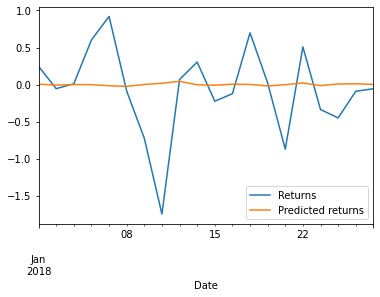

In [106]:
results[:20].plot()

# Out-of-Sample Performance

Evaluating the model using "out-of-sample" data (`X_test` and `y_test`)

Out-of-Sample Root Mean Squared Error (RMSE): 0.6445820942663303


<AxesSubplot:xlabel='Date'>

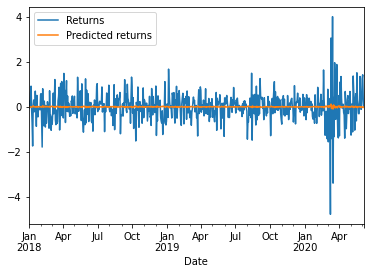

In [124]:
mse = mean_squared_error(
    results["Returns"],
    results["Predicted returns"])

rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

results.plot()

# In-Sample Performance

Evaluating the model using in-sample data (X_train and y_train)

In-sample Root Mean Squared Error (RMSE): 0.8418722775348019


<AxesSubplot:xlabel='Date'>

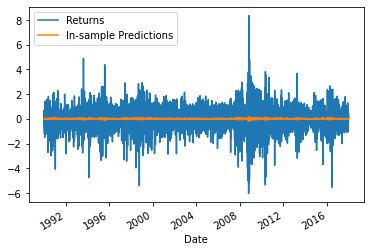

In [122]:
in_sample_results = y_train.to_frame()
  
in_sample_results["In-sample Predictions"] = linear_model.predict(X_train)

in_sample_mse = mean_squared_error(
    in_sample_results["Returns"],
    in_sample_results["In-sample Predictions"])

in_sample_rmse = np.sqrt(in_sample_mse)

print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

in_sample_results.plot()

# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

The lower rmse metric for the out-of-sample data indicated that the model performs best with out-of-sample data that with in-sample data used to trained it.